#### Kmean clustering approach

In [3]:
import sklearn.cluster

In [5]:
print(dir(sklearn.cluster))

['AffinityPropagation', 'AgglomerativeClustering', 'Birch', 'DBSCAN', 'FeatureAgglomeration', 'KMeans', 'MeanShift', 'MiniBatchKMeans', 'OPTICS', 'SpectralBiclustering', 'SpectralClustering', 'SpectralCoclustering', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_affinity_propagation', '_agglomerative', '_bicluster', '_birch', '_dbscan', '_dbscan_inner', '_feature_agglomeration', '_hierarchical_fast', '_k_means_common', '_k_means_elkan', '_k_means_lloyd', '_k_means_minibatch', '_kmeans', '_mean_shift', '_optics', '_spectral', 'affinity_propagation', 'cluster_optics_dbscan', 'cluster_optics_xi', 'compute_optics_graph', 'dbscan', 'estimate_bandwidth', 'get_bin_seeds', 'k_means', 'kmeans_plusplus', 'linkage_tree', 'mean_shift', 'spectral_clustering', 'ward_tree']


In [6]:
from sklearn.cluster import KMeans

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('Mall_Customers.csv')

In [9]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# shortcut to drop some columns from your dataset and update it in same command: 

In [10]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [11]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [12]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [13]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [ ]:
# mathematical formula: wcss 
# giving me one chart to find out optimum k value

In [22]:
x = df.iloc[:,[2,3]].values

In [23]:
wcss = [] 
for i in range(1, 11): 
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    km.fit(x) 
    wcss.append(km.inertia_)

C:\Users\enasi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124]

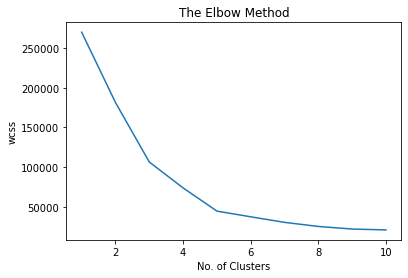

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method') 
plt.xlabel('No. of Clusters') 
plt.ylabel('wcss') 
plt.show()

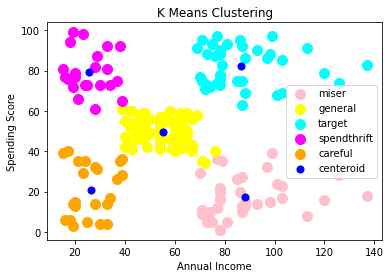

In [26]:
# cluster value is 5: 

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')


plt.title('K Means Clustering') 
plt.xlabel('Annual Income') 
plt.ylabel('Spending Score') 
plt.legend() 
plt.show()